In [3]:
import numpy as np 

subid = np.genfromtxt('./subid_1.txt', dtype='str') #np.loadtxt('./subject_ids.txt')
dx = np.loadtxt('./dx_1.txt')
pred = np.loadtxt('./pred_1.txt')
features = np.loadtxt('./features_1.txt')

In [5]:
from sklearn.manifold import TSNE

f_embedded = TSNE(n_components=2).fit_transform(features)
f_embedded.shape

(1457, 2)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


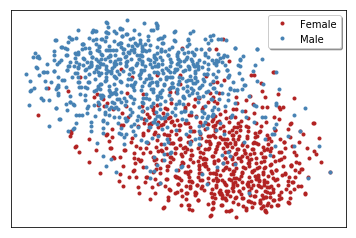

In [145]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig, ax = plt.subplots()
plt.plot(f_embedded[dx==1,0], f_embedded[dx==1,1], '.', c='firebrick', label='Female');
plt.plot(f_embedded[dx==0,0], f_embedded[dx==0,1], '.', c='steelblue', label='Male')
plt.xticks(np.arange(0), ())
plt.yticks(np.arange(0), ())
plt.legend(loc='best', shadow=True);
fig.show()
fig.savefig('tsne_features_2d.eps', format='eps', dpi=300)
fig.savefig('tsne_features_2d.jpg', format='jpg', dpi=300)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 432x288 with 0 Axes>

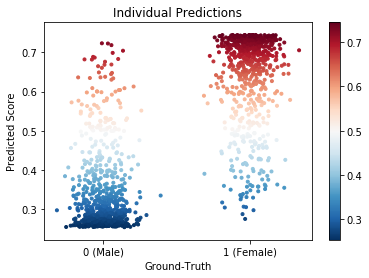

In [69]:
import matplotlib.pylab as pl
from matplotlib.mlab import bivariate_normal

mpl_fig = plt.figure()
mu, sigma = 0, 0.1 # mean and standard deviation
randval = np.random.normal(mu, sigma, dx.shape[0])

X = dx+randval
Y = pred

#plt.plot(X, Y, 'o')
fig, ax = plt.subplots()
im = ax.scatter(X,Y, c=pred, cmap='RdBu_r', marker='.')
#pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu_r'))

plt.xticks(np.arange(2), ('0 (Male)', '1 (Female)'))
plt.xlabel('Ground-Truth')
plt.ylabel('Predicted Score')
plt.colorbar(im)
plt.title('Individual Predictions')
fig.show()
fig.savefig('individual_predictions.eps', format='eps', dpi=300)
fig.savefig('individual_predictions.jpg', format='jpg', dpi=300)

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

f_embedded2 = TSNE(n_components=3).fit_transform(features)
f_embedded2.shape

(1457, 3)

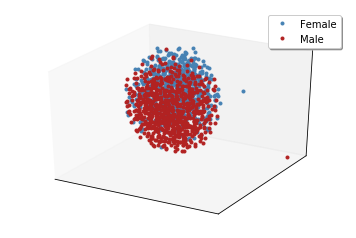

In [124]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(f_embedded2[dx==1,0], f_embedded2[dx==1,1], f_embedded2[dx==1,2], '.', c='steelblue', label='Female')
ax.plot3D(f_embedded2[dx==0,0], f_embedded2[dx==0,1], f_embedded2[dx==0,2], '.', c='firebrick', label='Male')
#ax.view_init(15, 15)

#plt.plot(f_embedded2[dx==0,0], f_embedded2[dx==0,1], '.', c='firebrick', label='Male')
plt.xticks(np.arange(0), ())
plt.yticks(np.arange(0), ())
ax.set_zticks(np.arange(0), ())
plt.legend(loc='best', shadow=True);
plt.show()
#fig.savefig('tsne_features_3d.eps', format='eps', dpi=300)
#fig.savefig('tsne_features_3d.jpg', format='jpg', dpi=300)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\ranking.py:563: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\ranking.py:94: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


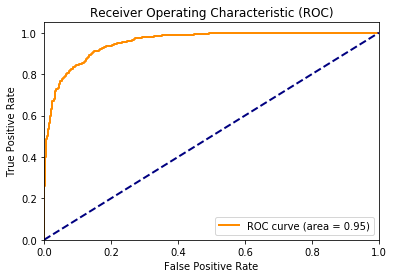

In [144]:
# Plot ROC Curve
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(dx[dx==i], pred[dx==i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(dx.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

fig = plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

fig.savefig('roc.eps', format='eps', dpi=300)
fig.savefig('roc.jpg', format='jpg', dpi=300)


In [139]:
roc_auc

{0: nan, 1: nan, 'micro': 0.9542889624982531}